Dataset Shape: (569, 30)
Class Labels: ['malignant' 'benign']
Confusion Matrix:
 [[40  3]
 [ 5 66]]
Accuracy  : 0.9298
Precision : 0.9565
Recall    : 0.9296
F1 Score  : 0.9429


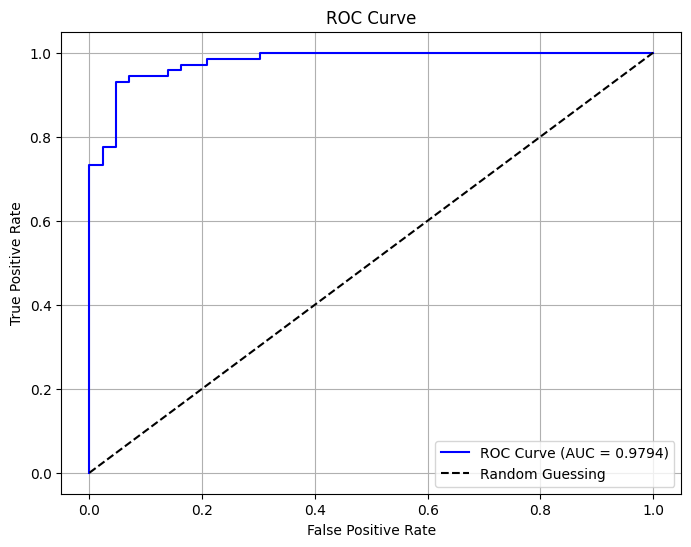

In [1]:
# 3.Logistic Regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# load dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset Shape:", X.shape)
print("Class Labels:", cancer.target_names)

# Data exploration and preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement logistic model
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def for_prop(X, w, b):
  z = np.dot(X,w) + b
  a = sigmoid(z)
  return a

def compute_cost_mle(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-15
    cost = - (1/m) * np.sum(
        y_true * np.log(y_pred + epsilon) +
        (1 - y_true) * np.log(1 - y_pred + epsilon)
    )
    return cost

def back_prop(y_pred, y, X):
  m = y.shape[0]
  dw = (1/m) * np.sum(np.square(y_pred - y))
  db = (1/m) * np.sum(y_pred - y)
  return dw, db

def gradient_descent(w, b ,dw, db, learning_rate):
  w = w - learning_rate * dw
  b = b - learning_rate * db
  return w, b

def logistic_model(X, y, epochs, learning_rate = 0.01):
  w = np.zeros(X.shape[1])
  b = 0
  losses = []
  for i in range(epochs):
    y_pred = for_prop(X, w, b)
    dw, db = back_prop(y_pred, y, X)
    w, b = gradient_descent(w, b, dw, db, learning_rate)
    loss = compute_cost_mle(y, y_pred)
    losses.append(loss)

  return w, b, losses

# Train the model
w, b, losses = logistic_model(X_train, y_train, epochs=1000, learning_rate=0.01)

# Make prediction
def predict(X, w, b, threshold=0.5):
    probabilities = for_prop(X, w, b)
    return [1 if p > threshold else 0 for p in probabilities], probabilities

y_pred, y_prob = predict(X_test, w, b)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()